# Customer Segmentation for Online Retailing - EDA

##  Exploratory Data Analysis

In [1]:
#Load python packages
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

color = sns.color_palette()

In [2]:
df = pd.read_csv('G:/My Drive/Jun/Mechine Learning/Data Science/Capstone Two/CleanData.csv')
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Weekday,Month_year,Day_Month_Year,Hour,Spending
0,0,549222,16008,SMALL FOLDING SCISSOR(POINTED EDGE),24,2011-04-07 10:43:00,0.25,12347,Iceland,7,4,2011,Thursday,2011-04-01 00:00:00,2011-04-07 00:00:00,10,6.0
1,1,556201,17021,NAMASTE SWAGAT INCENSE,36,2011-06-09 13:01:00,0.30,12347,Iceland,9,6,2011,Thursday,2011-06-01 00:00:00,2011-06-09 00:00:00,13,10.8
2,2,549222,20665,RED RETROSPOT PURSE,6,2011-04-07 10:43:00,2.95,12347,Iceland,7,4,2011,Thursday,2011-04-01 00:00:00,2011-04-07 00:00:00,10,17.7
3,3,542237,20719,WOODLAND CHARLOTTE BAG,10,2011-01-26 14:30:00,0.85,12347,Iceland,26,1,2011,Wednesday,2011-01-01 00:00:00,2011-01-26 00:00:00,14,8.5
4,4,562032,20719,WOODLAND CHARLOTTE BAG,10,2011-08-02 08:48:00,0.85,12347,Iceland,2,8,2011,Tuesday,2011-08-01 00:00:00,2011-08-02 00:00:00,8,8.5


In [3]:
del df['Unnamed: 0']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388057 entries, 0 to 388056
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InvoiceNo       388057 non-null  int64  
 1   StockCode       388057 non-null  object 
 2   Description     388057 non-null  object 
 3   Quantity        388057 non-null  int64  
 4   InvoiceDate     388057 non-null  object 
 5   UnitPrice       388057 non-null  float64
 6   CustomerID      388057 non-null  int64  
 7   Country         388057 non-null  object 
 8   Day             388057 non-null  int64  
 9   Month           388057 non-null  int64  
 10  Year            388057 non-null  int64  
 11  Weekday         388057 non-null  object 
 12  Month_year      388057 non-null  object 
 13  Day_Month_Year  388057 non-null  object 
 14  Hour            388057 non-null  int64  
 15  Spending        388057 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 47.4+ M

In [8]:
df['InvoiceNo'].astype(str)
df['CustomerID'].astype(str)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388057 entries, 0 to 388056
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       388057 non-null  int64         
 1   StockCode       388057 non-null  object        
 2   Description     388057 non-null  object        
 3   Quantity        388057 non-null  int64         
 4   InvoiceDate     388057 non-null  datetime64[ns]
 5   UnitPrice       388057 non-null  float64       
 6   CustomerID      388057 non-null  int64         
 7   Country         388057 non-null  object        
 8   Day             388057 non-null  int64         
 9   Month           388057 non-null  int64         
 10  Year            388057 non-null  int64         
 11  Weekday         388057 non-null  object        
 12  Month_year      388057 non-null  object        
 13  Day_Month_Year  388057 non-null  object        
 14  Hour            388057 non-null  int

In [ ]:
# for the purpose of time series analysis, let's split the InvoiceDate into details.
df['Day'] = df['InvoiceDate'].dt.day
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Weekday'] = df['InvoiceDate'].dt.day_name()
df['Month_year'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))
df['Day_Month_Year'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['Hour'] = df['InvoiceDate'].dt.hour

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC1A183430>,
      dtype=object)

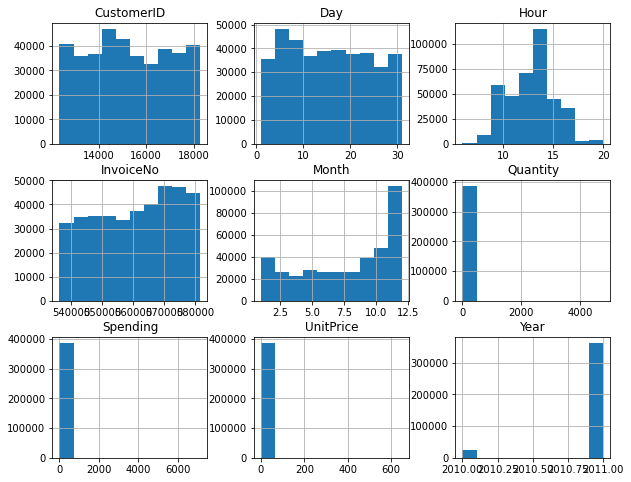

In [9]:
# A quick check of variable distributions.

df.hist(figsize=(10, 8))

The following information could be extracted from above histogram distributions:
    Quantity and UnitPrice are highly skewed, while the distribution is so large. As a consequence, revenue (product of Quantity and UnitPrice) exhibits the same pattern. Further investigation is needed on those large data.<br>
   > **Purchases are mostly happened in early afternoons, from 1PM to 215PM, followed by time period from 1145AM to 1PM and then from 9AM to 10AM.** <br>
   > **Most purchasess happeed in holiday seasons, December, November, January and October are when the transaction volumes are high.**

### 3.1.1 Analysis by country

In [10]:
# What are the buying countries?
df['Country'].unique()

array(['Iceland', 'Finland', 'Italy', 'Norway', 'Bahrain', 'Spain',
       'Portugal', 'Switzerland', 'Austria', 'Cyprus', 'Belgium',
       'Unspecified', 'Denmark', 'Australia', 'France', 'Germany', 'RSA',
       'Greece', 'Sweden', 'Israel', 'Saudi Arabia', 'Poland', 'USA',
       'United Arab Emirates', 'Singapore', 'United Kingdom', 'Japan',
       'Netherlands', 'Lebanon', 'Brazil', 'Czech Republic', 'EIRE',
       'Channel Islands', 'European Community', 'Lithuania', 'Canada',
       'Malta'], dtype=object)

In [11]:
# Count how many countries in total

print(len(df['Country'].unique()))

37


#### 3.1.1.1 By # of transactions

In [12]:
# Each InvoiceNo is corresponding to one transacton.
df_country_transaction = df['InvoiceNo'].groupby(df['Country']).count().sort_values(ascending = False)
print(df_country_transaction)

Country
United Kingdom          346340
Germany                   8568
France                    7940
EIRE                      6990
Spain                     2393
Netherlands               2318
Belgium                   1925
Switzerland               1802
Portugal                  1410
Australia                 1112
Norway                    1039
Channel Islands            743
Italy                      731
Finland                    646
Cyprus                     599
Sweden                     425
Austria                    382
Denmark                    364
Poland                     320
Japan                      320
Israel                     245
Unspecified                241
Singapore                  215
Iceland                    182
Canada                     150
Greece                     142
Malta                      108
USA                         67
United Arab Emirates        67
RSA                         57
European Community          57
Lebanon                     45


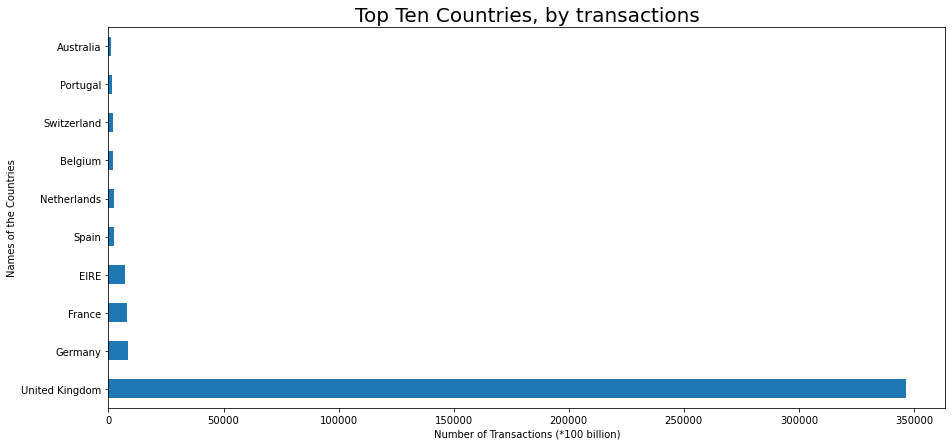

In [20]:
# Top 10 countries with highest transactions  
df_country_transaction.head(10).plot.barh(figsize = (15, 7))

plt.title('Top Ten Countries, by transactions', fontsize = 20)
plt.xlabel('Number of Transactions (*100 billion)')
plt.ylabel('Names of the Countries')
plt.show()

Obviously, UK is the country with largest transactions. We would like to take a closer look at other countries. 

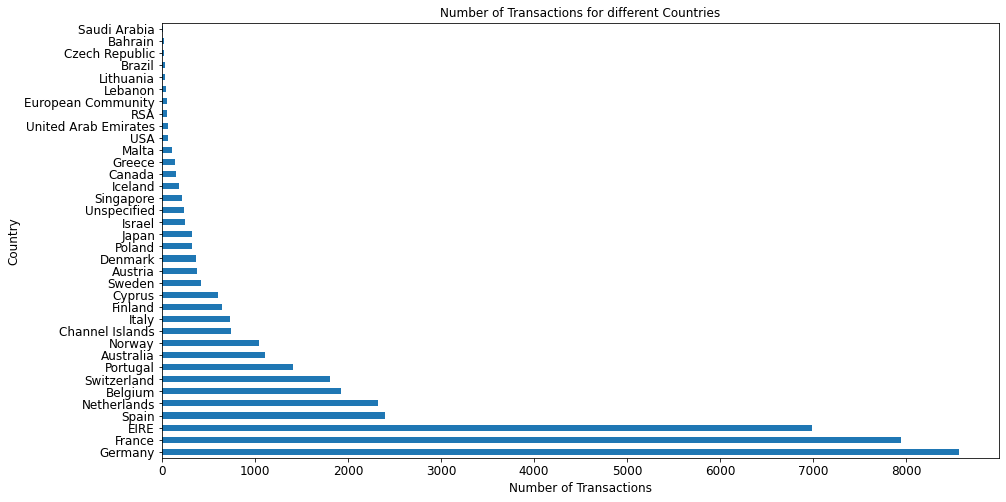

In [22]:
df_country_transaction_woUK = df_country_transaction.drop(['United Kingdom']) # for illustration purpose

# plot number of orders in each country (without UK)
plt.subplots(figsize=(15,8))
df_country_transaction_woUK.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Transactions for different Countries', fontsize=12)
plt.show()

#### 3.1.1.2 By Quantity

In [16]:
df_country_quantity = df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending = False)
print(df_country_quantity)

Country
United Kingdom          4018793
Netherlands              199934
EIRE                     136180
Germany                  117032
France                   109141
Australia                 83461
Sweden                    35853
Switzerland               29734
Spain                     26655
Japan                     25976
Belgium                   22915
Norway                    19192
Portugal                  15927
Finland                   10605
Channel Islands            9481
Denmark                    8160
Italy                      8029
Cyprus                     6303
Singapore                  5234
Austria                    4808
Israel                     4043
Poland                     3655
Canada                     2762
Iceland                    2458
Unspecified                1785
Greece                     1550
USA                        1034
United Arab Emirates        981
Malta                       956
Czech Republic              646
Lithuania                   640


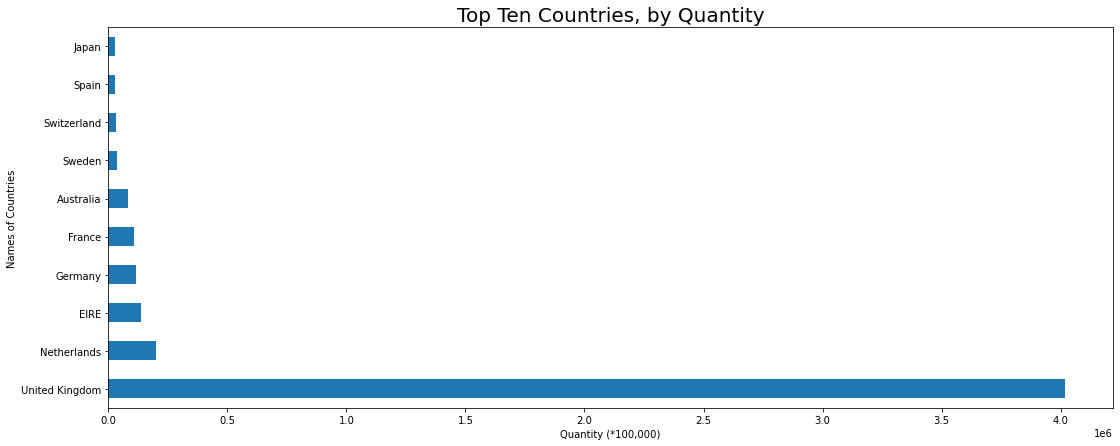

In [23]:
# Top 10 countries with highest Quantity 

df_country_quantity.head(10).plot.barh(figsize = (18, 7))
plt.title('Top Ten Countries, by Quantity', fontsize = 20)
plt.xlabel('Quantity (*100,000)')
plt.ylabel('Names of Countries')
plt.show()

Let's take a closer look at countries other than UK. 

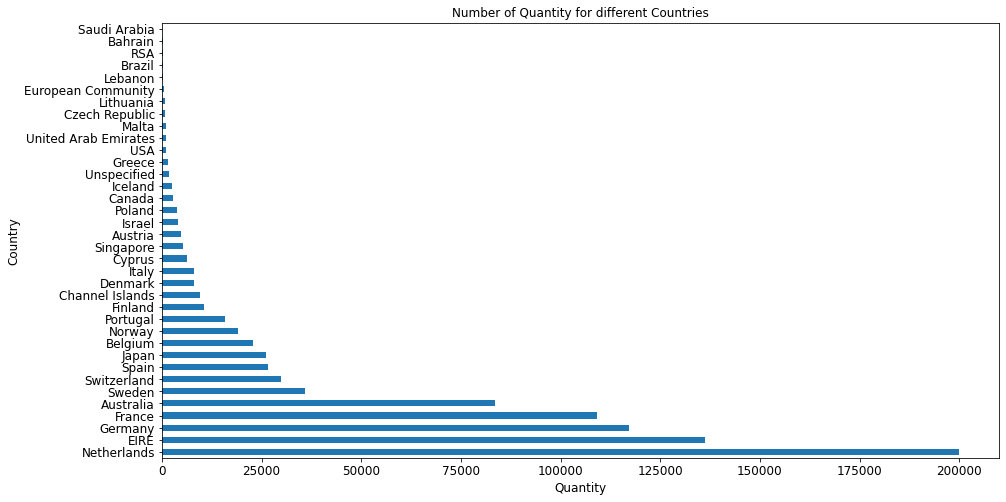

In [24]:
df_country_quantity_woUK = df_country_quantity.drop(['United Kingdom']) # for illustration purpose

# plot number of orders in each country (without UK)
plt.subplots(figsize=(15,8))
df_country_quantity_woUK.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Quantity for different Countries', fontsize=12)
plt.show()

#### 3.1.1.3 By Revenue

In [25]:
df_country_revenue = df['Spending'].groupby(df['Country']).agg('sum').sort_values(ascending = False)
df_country_revenue

Country
United Kingdom          6.828573e+06
Netherlands             2.834435e+05
EIRE                    2.474143e+05
Germany                 2.027492e+05
France                  1.814831e+05
Australia               1.371062e+05
Spain                   5.202997e+04
Switzerland             5.201745e+04
Japan                   3.731437e+04
Belgium                 3.674229e+04
Sweden                  3.641083e+04
Norway                  3.226576e+04
Portugal                2.652405e+04
Channel Islands         1.999754e+04
Finland                 1.832703e+04
Denmark                 1.808124e+04
Italy                   1.558674e+04
Cyprus                  1.294091e+04
Singapore               9.120390e+03
Austria                 8.528480e+03
Israel                  7.215840e+03
Poland                  6.838450e+03
Greece                  4.425520e+03
Iceland                 4.310000e+03
Canada                  3.115440e+03
Unspecified             2.660770e+03
Malta                   2.0506

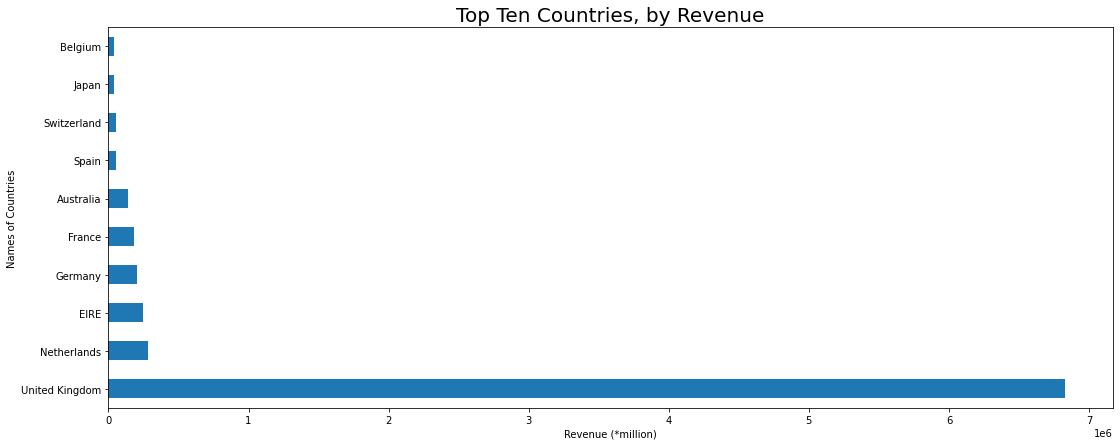

In [28]:
# Top 10 countries, by Revenue 

df_country_revenue.head(10).plot.barh(figsize = (18, 7))
plt.title('Top Ten Countries, by Revenue', fontsize = 20)
plt.xlabel('Revenue (*million)')
plt.ylabel('Names of Countries')
plt.show()

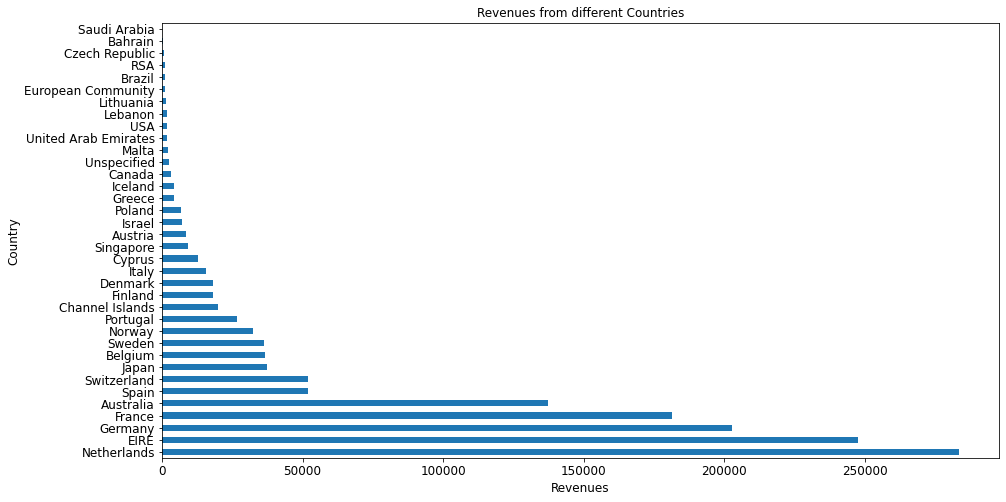

In [30]:
df_country_revenue_woUK = df_country_revenue.drop(['United Kingdom']) # for illustration purpose

# plot number of orders in each country (without UK)
plt.subplots(figsize=(15,8))
df_country_revenue_woUK.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Revenues', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Revenues from different Countries', fontsize=12)
plt.show()

#### 3.1.1.4 Summary - analysis by country

No matter by what standard, **United Kingdom is the largest and predominating market for this retailer**. <br>
In terms of number of transactions, Germany, France, EIRE, Spain, Netherlands, Belgium, and Switzerland are leading countries. <br>
In terms of Quantity and Revenue, Netherlands, EIRE, Germany, France, Austrialia are leading. 


### 3.1.2 Analysis by time

#### 3.1.2.1 Time-based transaction analysis 

In [31]:
# Data frames for plots --- Each InvoiceNo corresponds to one transaction
plot1 = pd.DataFrame(df.groupby(['Month_year'])['InvoiceNo'].count()).reset_index()
plot2 = pd.DataFrame(df.groupby(['Weekday'])['InvoiceNo'].count())
plot3 = pd.DataFrame(df.groupby(['Hour'])['InvoiceNo'].count()).reset_index()

plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

In [32]:
df['Month_year'].value_counts()

2011-11-01 00:00:00    62687
2011-10-01 00:00:00    48169
2011-09-01 00:00:00    39183
2011-05-01 00:00:00    27726
2011-06-01 00:00:00    26556
2011-08-01 00:00:00    26498
2011-03-01 00:00:00    26444
2011-07-01 00:00:00    26207
2010-12-01 00:00:00    25331
2011-04-01 00:00:00    22172
2011-01-01 00:00:00    20673
2011-02-01 00:00:00    19481
2011-12-01 00:00:00    16930
Name: Month_year, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

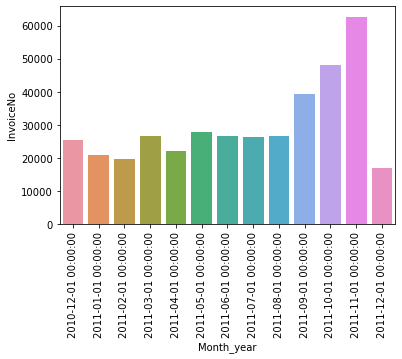

In [43]:
# Transactions in each month
ax = sns.barplot(x="Month_year", y="InvoiceNo", data = plot1)
plt.xticks(rotation = 90)

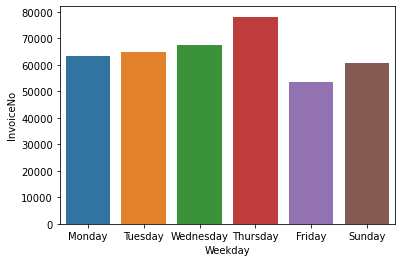

In [34]:
# Transactions in each weekday
ax = sns.barplot(x="Weekday", y="InvoiceNo", data = plot2)

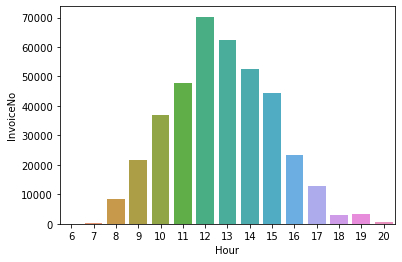

In [35]:
# Transactions in each hour
ax = sns.barplot(x="Hour", y="InvoiceNo", data = plot3)

#### 3.1.2.2 Time-based revenue analysis 

In [38]:
# Data frames for plots
plot4 = pd.DataFrame(df.groupby(['Month_year'])['Spending'].sum()).reset_index()
plot5 = pd.DataFrame(df.groupby(['Weekday'])['Spending'].sum())
plot6 = pd.DataFrame(df.groupby(['Hour'])['Spending'].sum()).reset_index()

plot5 = plot5.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

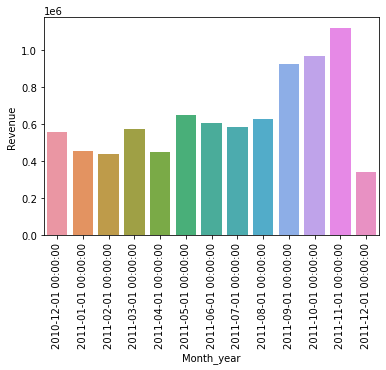

In [50]:
# Revenue in each month
ax = sns.barplot(x = 'Month_year', y='Spending', data = plot4)
plt.ylabel('Revenue')
plt.xticks(rotation=90)

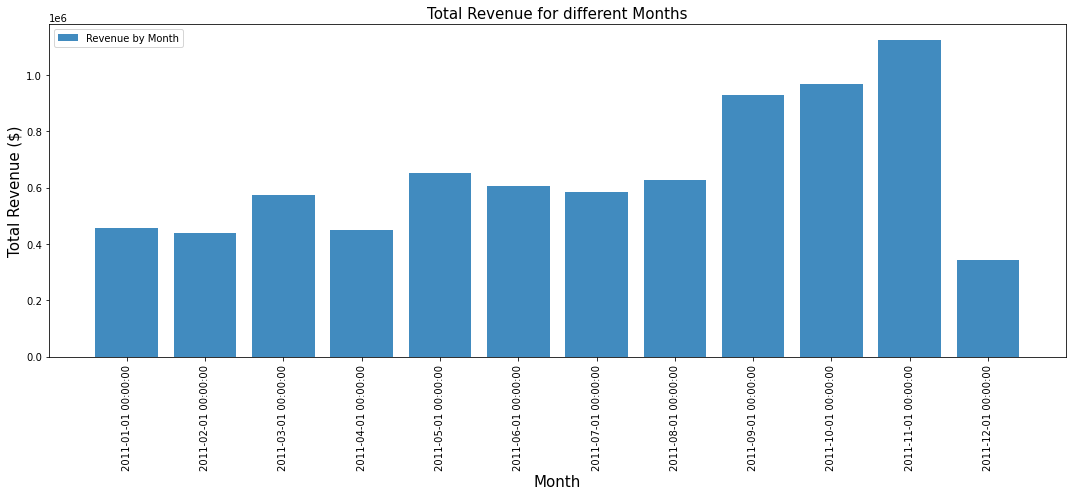

In [49]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

ax1.set_xlabel('Month',fontsize=15)
ax1.set_ylabel('Total Revenue ($)',fontsize=15)
ax1.set_title('Total Revenue for different Months',fontsize=15)
ax1.bar(df.groupby(by=['Month_year'])['Spending'].sum().index.tolist()[1:],
        df.groupby(by=['Month_year'])['Spending'].sum()[1:],
        alpha=0.85,
        label='Revenue by Month')
#----------------
#ax2 = ax1.twinx()
#ax2.set_ylabel('Percentage Change of Total Revenue (%)',fontsize=15)
#ax2.plot(df.groupby(by=['Month_year'])['Spending'].sum().index.tolist()[1:], 
        # df.groupby(by=['Month_year'])['Spending'].sum()[1:].pct_change().fillna(0)*100,
        # label='Percentage change of total revenue (%)',
       #  color='red')

ax1.legend(loc='upper left')
#ax2.legend(loc='upper right')
plt.xticks(rotation=90)
fig.tight_layout()
plt.show()

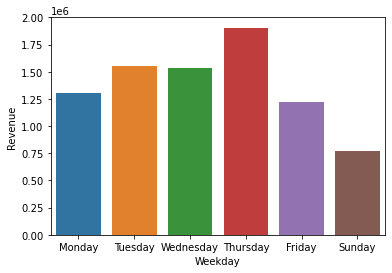

In [51]:
# Revenue in each weekday
ax = sns.barplot(x = 'Weekday', y='Spending', data = plot5)
plt.ylabel('Revenue')

# Annotate bar chart with percentage

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
# for i in ax.patches:
 #   totals.append(i.get_height())

# set individual bar lables using above list
# total = sum(totals)

# set individual bar lables using above list
# for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
  #  ax.text(i.get_x()+0.1, i.get_height()+40, \
   #         str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
    #            fontweight='bold', color='red')
# plt.show()

Text(0, 0.5, 'Revenue')

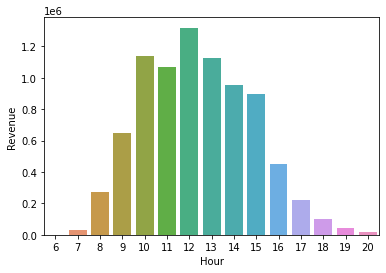

In [53]:
# Revenue in each hour
ax = sns.barplot(x = 'Hour', y='Spending', data = plot6)
plt.ylabel('Revenue')

#### 3.1.2.3 Summary - analysis by time 

There are more purchases and revenues made by the end of year. **November, October, and September are the top three months when there are most transactions and revenues.**<br>

In terms of weekdays, **Thursday is the day when there are more transactions and revenues than other days.** There is no transaction on Saturday. Wednesday, Tuesday, Monday, Sunday and Friday are the days with descending transactions. But Tuesday, Wednesday, Friday, Monday and Sunday are the days with descending revenues. 

In terms of hours, **noon is the time when there are more transactions and revenues than any other hours.** 13PM, 14PM 11AM, 15PM, 10AM are the time when there are higher transactions. Wither regarding to revenues, 10AM, 13PM, 11AM, 14PM, 15PM and 9AM are the times when there are more revenues. 

### 3.1.3 Analysis by product

In [ ]:
# conda install -c conda-forge wordcloud
# installed already, run the following code to update: 
# $ conda update -n base -c defaults conda

In [54]:
print("Number of unique descriptions: ", len(df['Description'].unique().tolist()))

Number of unique descriptions:  3853


In [55]:
df['Description'] = df['Description'].replace(to_replace=r'[^\w\s]', value='', regex=True)

In [56]:
print("Number of unique descriptions: ", len(df['Description'].unique().tolist()))

Number of unique descriptions:  3845


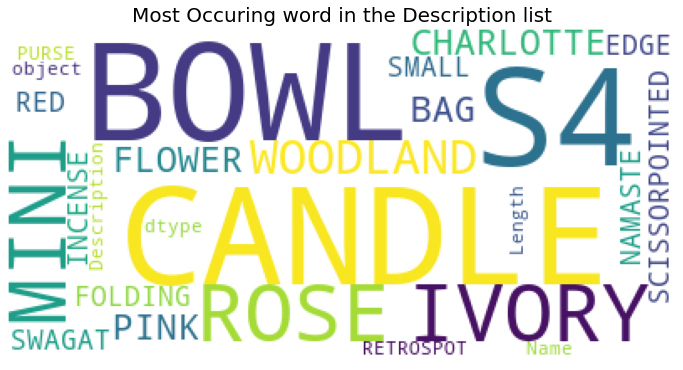

In [57]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white').generate(str(df['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

In [58]:
# most popular products
df['InvoiceNo'].groupby(df['Description']).agg('sum').sort_values(ascending = False)

Description
WHITE HANGING HEART TLIGHT HOLDER      1115526291
REGENCY CAKESTAND 3 TIER                930795823
JUMBO BAG RED RETROSPOT                 897844732
ASSORTED COLOUR BIRD ORNAMENT           778576295
PARTY BUNTING                           768658517
                                          ...    
GLASS BELL JAR SMALL                       536627
CAKESTAND 3 TIER LOVEHEART                 536627
PINK MARSHMALLOW SCARF KNITTING KIT        536576
POTTING SHED SOW N GROW SET                536488
GIRLY PINK TOOL SET                        536381
Name: InvoiceNo, Length: 3845, dtype: int64

In [60]:
# Products that bring in most revenues
df['Spending'].groupby(df['Description']).agg('sum').sort_values(ascending = False)

Description
REGENCY CAKESTAND 3 TIER             138337.60
WHITE HANGING HEART TLIGHT HOLDER     93918.30
JUMBO BAG RED RETROSPOT               83481.96
PARTY BUNTING                         67954.83
ASSORTED COLOUR BIRD ORNAMENT         56364.02
                                       ...    
PINK CRYSTAL GUITAR PHONE CHARM           0.85
PURPLE FRANGIPANI HAIRCLIP                0.85
VINTAGE BLUE TINSEL REEL                  0.84
SET 12 COLOURING PENCILS DOILEY           0.65
HEN HOUSE W CHICK IN NEST                 0.42
Name: Spending, Length: 3845, dtype: float64

### 3.1.4 Analysis by Customer

# 3.1.4.1 Analysis by Transaction

In [86]:
df_customer_transaction = df['InvoiceNo'].groupby(df['CustomerID']).count().sort_values(ascending = False)
df_customer_transaction.head(22)

CustomerID
17841    7566
14911    5458
14096    5093
12748    4356
14606    2622
15311    2297
14646    2058
13089    1810
13263    1662
14298    1637
15039    1468
14156    1373
18118    1253
14159    1170
16033    1120
14796    1117
15005    1101
14056    1080
14769    1060
13081    1018
14527     969
17511     949
Name: InvoiceNo, dtype: int64

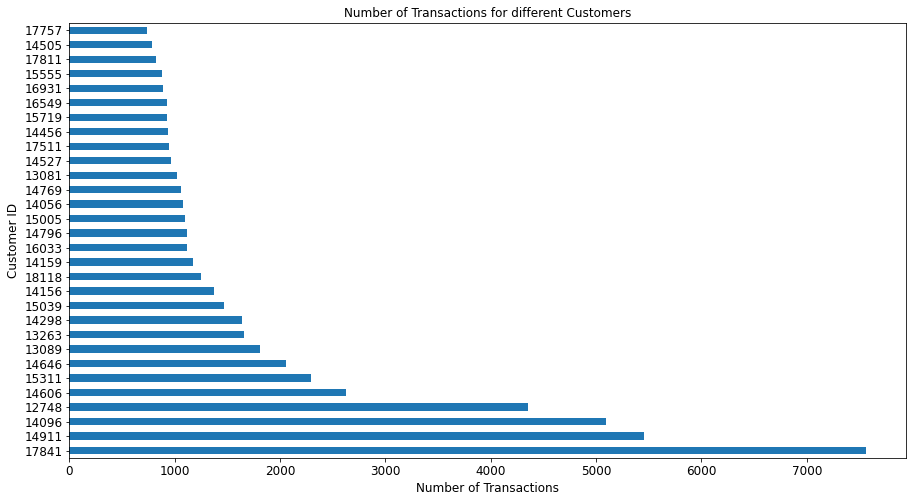

In [62]:
# plot number of orders for top customers

plt.subplots(figsize=(15,8))
df_customer_transaction.head(30).plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.title('Number of Transactions for different Customers', fontsize=12)
plt.show()

#### 3.1.4.2 Customer Analysis by Quantity

In [89]:
df_customer_quantity = df['Quantity'].groupby(df['CustomerID']).agg('sum').sort_values(ascending = False)
df_customer_quantity

CustomerID
14646    196556
14911     77103
12415     77056
17450     69031
18102     64124
17511     63149
13694     62328
14298     58343
14156     56956
16684     49091
Name: Quantity, dtype: int64

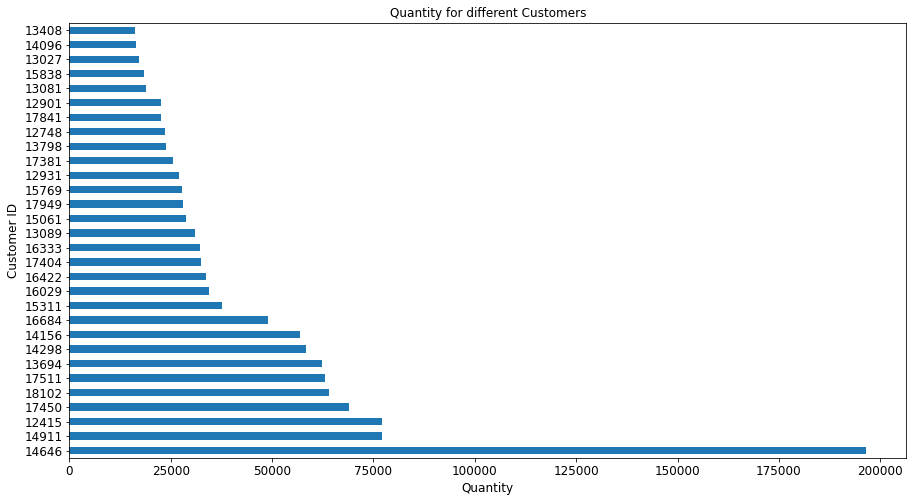

In [64]:
# plot number of orders for top customers

plt.subplots(figsize=(15,8))
df_customer_quantity.head(30).plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.title('Quantity for different Customers', fontsize=12)
plt.show()

#### 3.1.4.3 Customer Analysis by Revenue

In [98]:
df_customer_revenue = df['Spending'].groupby(df['CustomerID']).agg('sum').sort_values(ascending = False)
df_customer_revenue.head(60)

CustomerID
14646    278742.02
18102    259657.30
17450    189607.53
14911    129435.28
12415    123806.88
14156    113705.63
17511     88556.38
16684     64435.12
13694     63555.30
16029     62205.93
15311     59322.85
13089     58235.08
15061     54391.94
17949     54050.94
14096     53233.51
15769     51837.72
14298     51527.30
14088     50384.29
12931     40667.44
17841     39940.20
13798     36910.49
16013     35639.60
16422     34651.40
15838     33643.08
17389     31727.48
17404     31363.82
12748     30003.84
13098     28882.44
14680     28271.41
13081     28233.43
13408     28042.04
16333     26626.80
13777     25525.21
17857     25229.04
15749     24850.90
12753     21327.39
16210     21076.30
17381     20275.61
17675     20198.70
15039     19590.99
12731     18660.41
15159     18611.13
12471     17353.85
17428     17246.90
12901     17167.70
13881     17057.52
13767     16985.61
12921     16469.24
16839     16392.64
12678     16331.46
17677     16303.53
15189     16225.39
1

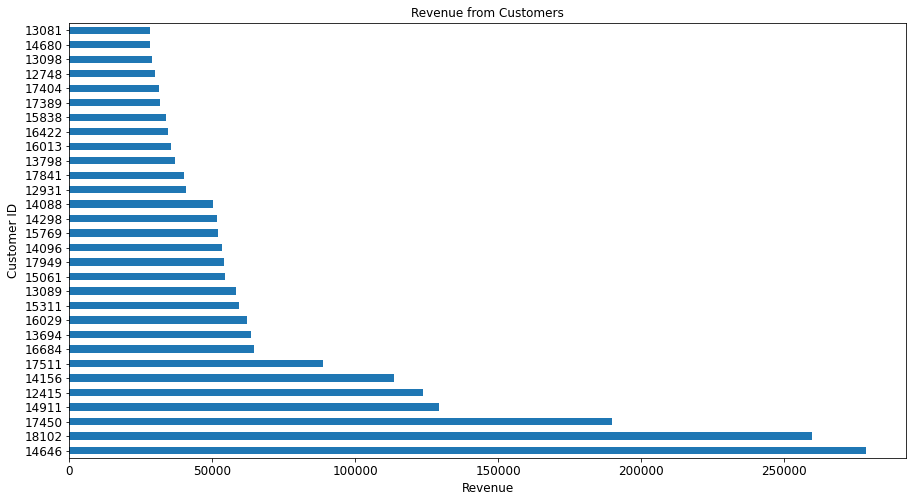

In [99]:
# plot number of orders for top customers

plt.subplots(figsize=(15,8))
df_customer_revenue.head(30).plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.title('Revenue from Customers', fontsize=12)
plt.show()